# Working with custom data sets in pytorch


## Domain libraries
 Depending on the area or problem you are working on you look in the pytorch domain specific libraries to know how to load data

In [2]:
import torch
from torch import nn


device='cuda' if torch.cuda.is_available() else 'cpu'



## Get data

In [3]:
import requests
import zipfile # data is in a zip file in a github repo
from  pathlib import Path

data_path=Path("data/")
image_path=data_path/"pizza_steak_sushi"


#if the image folder doesn't exist , download and unzip
if image_path.is_dir():
    print(f'{image_path} directory already exists....skipping donwload')

else:
    print(f"{image_path} does not exist.... creating one now.....")
    image_path.mkdir(parents=True,exist_ok=True)

# download

with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

    f.write(request.content)
# unzip zipfile
# 
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping pizza,steak and sushi data...")
    zip_ref.extractall(image_path)    
        


data\pizza_steak_sushi directory already exists....skipping donwload
Unzipping pizza,steak and sushi data...


# Data preparation and exploration

In [4]:
import os
def walk_through(dir_path):
    """Walk through dir_path returning its contents"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)}directories and {len(filenames)} images in {dirpath}")

In [5]:
walk_through(image_path)

there are 2directories and 0 images in data\pizza_steak_sushi
there are 3directories and 0 images in data\pizza_steak_sushi\test
there are 0directories and 25 images in data\pizza_steak_sushi\test\pizza
there are 0directories and 19 images in data\pizza_steak_sushi\test\steak
there are 0directories and 31 images in data\pizza_steak_sushi\test\sushi
there are 3directories and 0 images in data\pizza_steak_sushi\train
there are 0directories and 78 images in data\pizza_steak_sushi\train\pizza
there are 0directories and 75 images in data\pizza_steak_sushi\train\steak
there are 0directories and 72 images in data\pizza_steak_sushi\train\sushi


In [6]:
# train and testing dat paths
test_dir=image_path/"test"
train_dir=image_path/"train"
test_dir,train_dir

(WindowsPath('data/pizza_steak_sushi/test'),
 WindowsPath('data/pizza_steak_sushi/train'))

### Visualizing an image
1. Get all the image pathss
2. Pick a random image path using Pythons's random.choice()
3. Get the image class name using pathlib.Path.parent.stem
4. Open images with Python's PIL
5. We'll then show the image and print metadata

data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
Random image path:data\pizza_steak_sushi\test\sushi\2394442.jpg
Image_class:sushi
Image height:408
image width:512


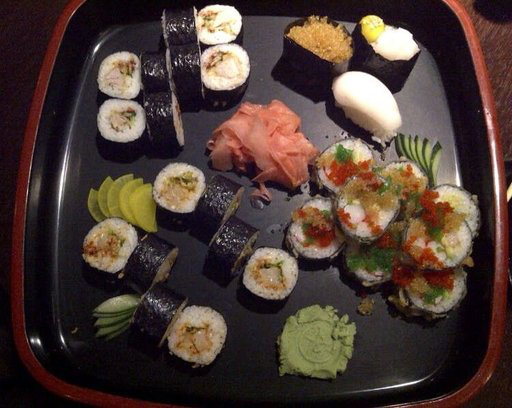

In [7]:
import random
from PIL import Image

#set random seed
random.seed(42)
# 1. get all the image paths
image_path_list=list(image_path.glob("*/*/*.jpg")) #gets all the images,puts it into a list so we can apply random.choice on it 

# 2 . pick a random image path

random_image_path=random.choice(image_path_list)

print(random_image_path)


# get image class name(name of the directory)
image_class=random_image_path.parent.stem
print(image_class)

# open image with pil
img=Image.open(random_image_path)

# print metadata
print(f"Random image path:{random_image_path}")
print(f"Image_class:{image_class}")
print(f"Image height:{img.height}")
print(f"image width:{img.width}")
img

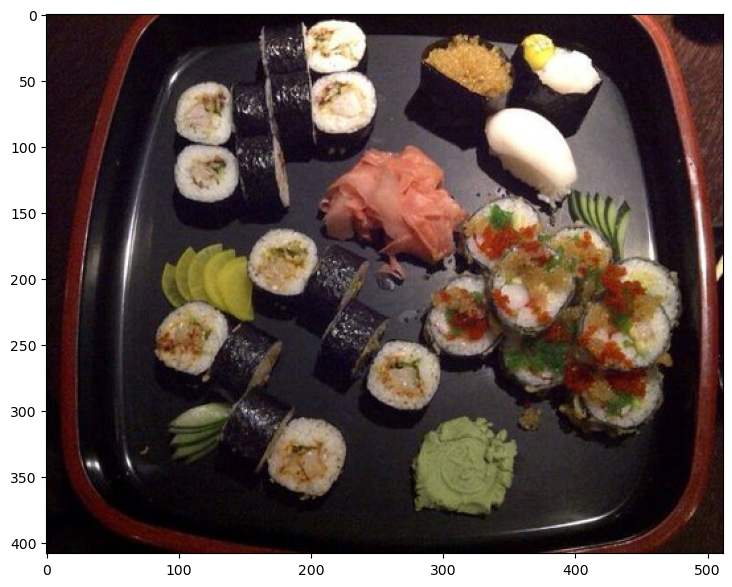

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# turn image into array
img_array=np.asarray(img)

#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_array)

# Transforming data from image to tensors
* Turn your target data into tensors
* Turn it into batches using torch.utils.data.Dataset and subsequently torch.utils.data.DataLoader
* Tranforms help you get your image data ready to be used by a model and also helps you to perform data augmentation


In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

## Transforming data with torchvision.transforms 
* Transforms helps you turn images into tensors
* Torchvision transforms also help with pre-processing your data and performing data augmentation on your data to feed to a model

In [10]:
# write a transform for the image

data_transform=transforms.Compose([
    # Resize our images 64x64
    transforms.Resize(size=(64,64)),
    # flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),
    # turn image into torch tensor
    transforms.ToTensor()

])



### visualizing transformed image

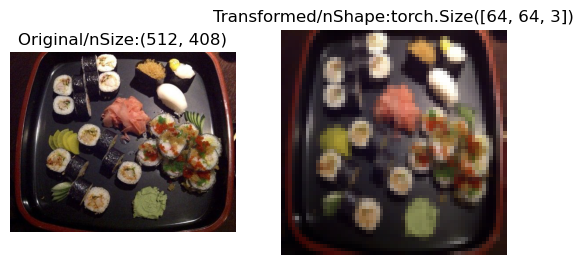

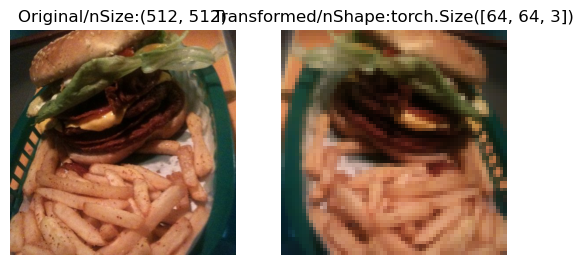

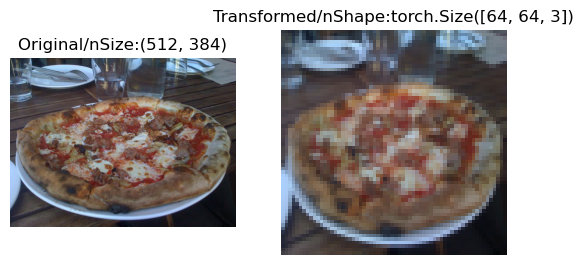

In [19]:
def plot_transformed_image(image_path,transform,n=3,seed=42):
    """
    Selects random images from a path of images and loads/transforms 
    then plots the original vs the transformed
    """
    if seed:
        random.seed(seed)
    random_image_paths=random.sample(image_path,k=n)
    for imaage_path in random_image_paths:
        with Image.open(imaage_path) as f:
            fig,ax=plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original/nSize:{f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image=transform(f).permute(1,2,0)# permutes the tensor changing the shape from C.H.W to H,W,C
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed/nShape:{transformed_image.shape}")
            ax[1].axis(False)

            #fig.suptitle(f"Class:{image_path.parent.stem},fontsize=16")

plot_transformed_image(image_path=image_path_list,
                       transform=data_transform,
                       n=3,seed=42)            



# Loading out dataset
## opti0on 1: loading image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

In [20]:
# Use ImageFolder to creaate dataset(s)

from torchvision import datasets

train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,# a transform for the data
                                target_transform=None)# a transform for the label/

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform,
                               target_transform=None)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

#### Getting the classes from the dataset

In [21]:
# get class names as a list
class_names=train_data.classes

class_names

['pizza', 'steak', 'sushi']

In [22]:
# get class names as a dictionary

class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

### Creating dataloader for the training and testing data



In [25]:
from torch.utils.data import DataLoader
import os

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            num_workers=1,# how many subprocesses to use for your data
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=32,
                           num_workers=1,
                           shuffle=False
                           )
train_dataloader,test_dataloader 

(<torch.utils.data.dataloader.DataLoader at 0x1539e365000>,
 <torch.utils.data.dataloader.DataLoader at 0x1539e365810>)

In [23]:
!nvidia-smi

Mon Jun 26 02:34:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.99       Driver Version: 527.99       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   38C    P8    14W /  94W |    783MiB /  6144MiB |     19%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## option 2 : Loading image dt with custom `dataset`
  1. Want to be able to load images from file
  2. Want to be able to get classnames from the dataset
  3. Want to be able to get dictionary from dataset

  Pros:
  1. Can create a dataset out of anything
  2. Not limited to Pytorch pre-built `Dataset` out of anything

  Cons:
  1. Might not always work
  2. Requires us to write more code which will lead to error or performance issues
  

In [ ]:
import os
import pathlib
import torch
import PIL
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List

